<a href="https://colab.research.google.com/github/ehtisham-Fazal/ACP_KSRC/blob/main/ACP_SRC_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# from google.colab import files
# files.upload()
# Import libraries
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio


from google.colab import drive
drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/data_set_acp/'
os.chdir(drive_path)
os.getcwd() 
!ls Orthogonal_results

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ACP_KSRC_STATS_CKSAAP_GAP8_Solver_OP_PC100.mat
ACP_KSRC_STATS_CKSAAP_GAP8_Solver_OP_PC10.mat
ACP_KSRC_STATS_CKSAAP_GAP8_Solver_OP_PC110.mat
ACP_KSRC_STATS_CKSAAP_GAP8_Solver_OP_PC150.mat
ACP_KSRC_STATS_CKSAAP_GAP8_Solver_OP_PC175.mat
ACP_KSRC_STATS_CKSAAP_GAP8_Solver_OP_PC200.mat
ACP_KSRC_STATS_CKSAAP_GAP8_Solver_OP_PC20.mat
ACP_KSRC_STATS_CKSAAP_GAP8_Solver_OP_PC225.mat
ACP_KSRC_STATS_CKSAAP_GAP8_Solver_OP_PC250.mat
ACP_KSRC_STATS_CKSAAP_GAP8_Solver_OP_PC300.mat
ACP_KSRC_STATS_CKSAAP_GAP8_Solver_OP_PC30.mat
ACP_KSRC_STATS_CKSAAP_GAP8_Solver_OP_PC350.mat
ACP_KSRC_STATS_CKSAAP_GAP8_Solver_OP_PC400.mat
ACP_KSRC_STATS_CKSAAP_GAP8_Solver_OP_PC40.mat
ACP_KSRC_STATS_CKSAAP_GAP8_Solver_OP_PC450.mat
ACP_KSRC_STATS_CKSAAP_GAP8_Solver_OP_PC500.mat
ACP_KSRC_STATS_CKSAAP_GAP8_Solver_OP_PC50.mat
ACP_KSRC_STATS_CKSAAP_GAP8_Solver_OP_PC550.mat
ACP_KSRC_STATS_CKSAAP_GAP8_Sol

In [11]:
txtPCs = ['10', '20', '30', '40', '50', '60', '70', '80', '90', '100', '110', '150', '175', '200', '225', '250', '300', '400', '450', '500', '550', '600']
len(txtPCs)

22

In [12]:
  if('Matching_Pursuit_results' in method):
    path = method
    method = 'MP'
  elif('Basis_pursuit_results' in method):
    path = method
    method = 'BP'
  elif('Orthogonal_results' in method):
    path = method
    method = 'OP'
  else: 
    print('results for the :' + method + 'not found')
  for PCs in txtPCs:
      file_name = path+'/ACP_KSRC_STATS_CKSAAP_GAP8_Solver_'+method+'_PC'+PCs+'.mat'
      print(file_name)
      Results=sio.loadmat(file_name, mdict=None, appendmat=True)
      # Results.keys()

      print(Results['Time_Statistics'].shape, Results['Class_Statistics'].shape)
      Time_stats = Results['Time_Statistics']

NameError: ignored

In [16]:
def load_results(method, txtPCs):
  if('Matching_Pursuit_results' in method):
    path = method
    method = 'MP'
  elif('Basis_pursuit_results' in method):
    path = method
    method = 'BP'
  elif('Orthogonal_results' in method):
    path = method
    method = 'OP'
  else: 
    print('results for the :' + method + 'not found')

  pc_wise_time_stats =[]
  pc_wise_class_stats =[]

  for PCs in txtPCs:
    file_name = path+'/ACP_KSRC_STATS_CKSAAP_GAP8_Solver_'+method+'_PC'+PCs+'.mat'
    print(file_name)
    Results=sio.loadmat(file_name, mdict=None, appendmat=True)
    # Results.keys()

    print(Results['Time_Statistics'].shape, Results['Class_Statistics'].shape)
    Time_stats = Results['Time_Statistics']
    Class_stats = Results['Class_Statistics']
    Time_stats=Time_stats.reshape((Time_stats.shape[0]*Time_stats.shape[1], ))

    pc_wise_time_stats.append(Time_stats)
    pc_wise_class_stats.append(Class_stats)


  #########################################################
  #########################################################
  pc_wise_time_stats = np.array(pc_wise_time_stats)
  pc_wise_time_stats = np.transpose(pc_wise_time_stats)
  
  pc_wise_class_stats = np.array(pc_wise_class_stats)
  pc_wise_class_stats = np.transpose(pc_wise_class_stats)

  print('pc_wise_time_stats.shape:',pc_wise_time_stats.shape,'pc_wise_class_stats.shape:',pc_wise_class_stats.shape)

  return pc_wise_time_stats, pc_wise_class_stats


def box_plot_results(pc_wise_time_stats,txtPCs,label_txt,color,marker):
   # Creating plot
  if ('Matching-Pursuit' in label_txt):
    start_pos = 1
    print('start_pos:',start_pos)
  if ('Orthogonal-Matching-Pursuit' in label_txt):
    start_pos = 2
    print('start_pos:',start_pos)
  if ('Basis-Pursuit' in label_txt):
    start_pos = 3
    print('start_pos:',start_pos)

  positions = range(start_pos,3*len(txtPCs)+1,3)
  bplot1 = plt.boxplot(pc_wise_time_stats,patch_artist=True, positions=positions)
  # fill with colors
  for patch in bplot1['boxes']:
      patch.set_facecolor(color)
  
  # changing style of fliers
  for flier in bplot1['fliers']:
      flier.set(marker = marker,
                color =color,
                alpha = 0.5)
  if (start_pos==3):
    plt.xticks(range(2,3*len(txtPCs)+1,3),txtPCs, rotation=20)

  plt.plot(range(start_pos,3*len(txtPCs)+1,3), np.median(pc_wise_time_stats,axis=0),label=label_txt,linewidth=2,color=color,marker=marker)


In [17]:
mp_pc_wise_time_stats, mp_pc_wise_class_stats = load_results('Matching_Pursuit_results', txtPCs)

bp_pc_wise_time_stats, bp_pc_wise_class_stats = load_results('Basis_pursuit_results', txtPCs)

op_pc_wise_time_stats, op_pc_wise_class_stats = load_results('Orthogonal_results', txtPCs)


Matching_Pursuit_results/ACP_KSRC_STATS_CKSAAP_GAP8_Solver_MP_PC10.mat
(5, 148) (5, 7)
Matching_Pursuit_results/ACP_KSRC_STATS_CKSAAP_GAP8_Solver_MP_PC20.mat
(5, 148) (5, 7)
Matching_Pursuit_results/ACP_KSRC_STATS_CKSAAP_GAP8_Solver_MP_PC30.mat
(5, 148) (5, 7)
Matching_Pursuit_results/ACP_KSRC_STATS_CKSAAP_GAP8_Solver_MP_PC40.mat
(5, 148) (5, 7)
Matching_Pursuit_results/ACP_KSRC_STATS_CKSAAP_GAP8_Solver_MP_PC50.mat
(5, 148) (5, 7)
Matching_Pursuit_results/ACP_KSRC_STATS_CKSAAP_GAP8_Solver_MP_PC60.mat
(5, 148) (5, 7)
Matching_Pursuit_results/ACP_KSRC_STATS_CKSAAP_GAP8_Solver_MP_PC70.mat
(5, 148) (5, 7)
Matching_Pursuit_results/ACP_KSRC_STATS_CKSAAP_GAP8_Solver_MP_PC80.mat
(5, 148) (5, 7)
Matching_Pursuit_results/ACP_KSRC_STATS_CKSAAP_GAP8_Solver_MP_PC90.mat
(5, 148) (5, 7)
Matching_Pursuit_results/ACP_KSRC_STATS_CKSAAP_GAP8_Solver_MP_PC100.mat
(5, 148) (5, 7)
Matching_Pursuit_results/ACP_KSRC_STATS_CKSAAP_GAP8_Solver_MP_PC110.mat
(5, 148) (5, 7)
Matching_Pursuit_results/ACP_KSRC_STATS_C

start_pos: 1
start_pos: 1
start_pos: 2
start_pos: 3


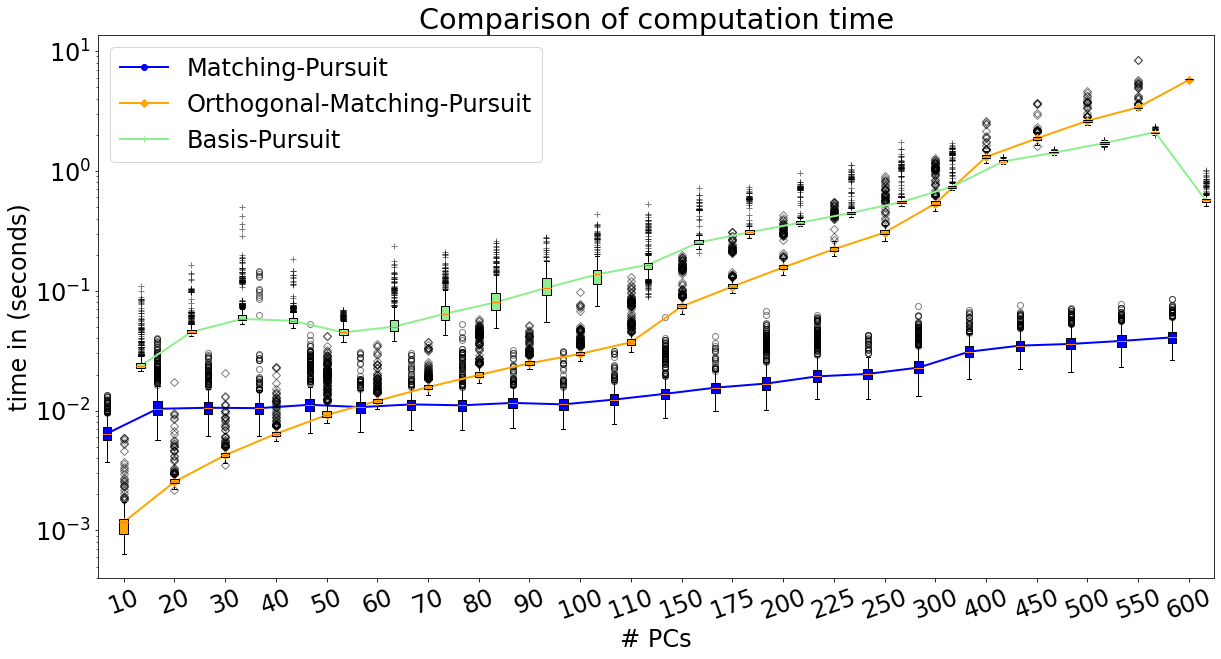

In [18]:
##################################################################################################################
##################################################################################################################
# txtPCs = ['10', '20', '30', '40', '50', '60', '70', '80', '90', '100', '110', '150', '175', '200', '225', '250', '300', '400']
# numPCs = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 150, 175, 200, 225, 250, 300 400]

colors = ['blue', 'orange', 'lightgreen']
marker = ['o', 'D', '+']

# plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams.update({'font.size': 24})

fig = plt.figure(figsize =(20, 10))

box_plot_results(mp_pc_wise_time_stats,txtPCs,'Matching-Pursuit',colors[0],marker[0])
box_plot_results(op_pc_wise_time_stats,txtPCs,'Orthogonal-Matching-Pursuit',colors[1],marker[1])
box_plot_results(bp_pc_wise_time_stats,txtPCs,'Basis-Pursuit',colors[2],marker[2])
# plt.ylim(bottom=0)
# plt.ylim(top=7)
plt.xlabel('# PCs')
plt.ylabel('time in (seconds)')
plt.title('Comparison of computation time')
# show plot
plt.legend()
plt.yscale('log')
plt.savefig('Time_comparison.png',dpi=(300), bbox_inches='tight')
plt.show()





start_pos: 1
start_pos: 1
start_pos: 2
start_pos: 3


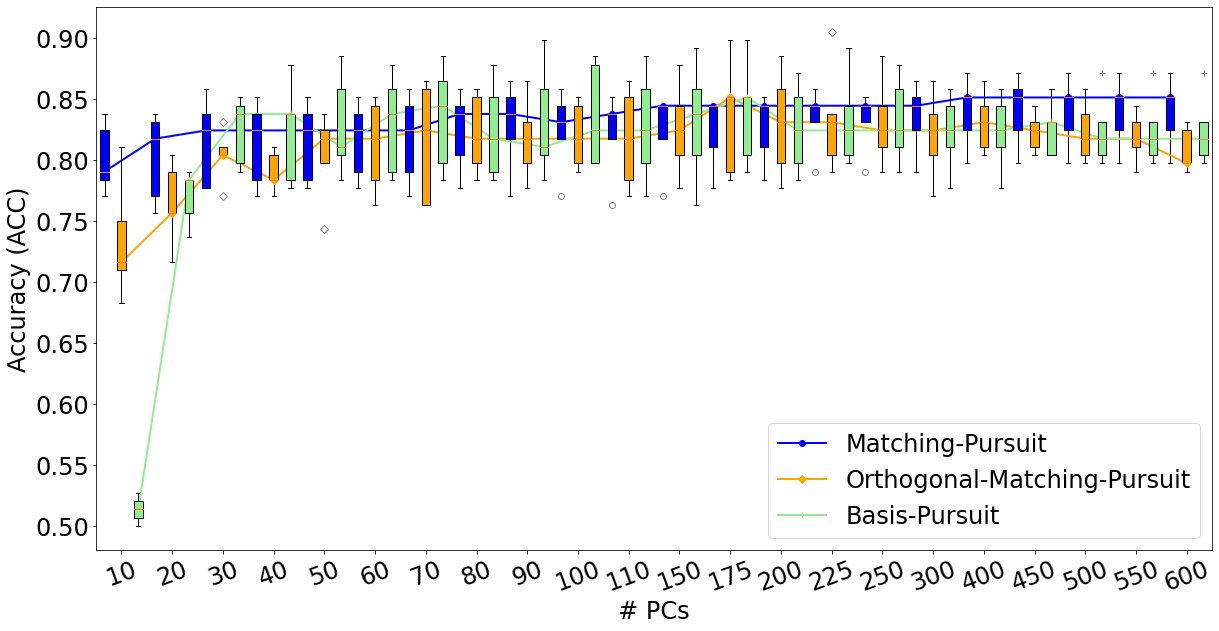

In [19]:
colors = ['blue', 'orange', 'lightgreen']
marker = ['o', 'D', '+']

# plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams.update({'font.size': 24})

fig = plt.figure(figsize =(20, 10))

box_plot_results(mp_pc_wise_class_stats[0,:].squeeze(),txtPCs,'Matching-Pursuit',colors[0],marker[0])
box_plot_results(op_pc_wise_class_stats[0,:].squeeze(),txtPCs,'Orthogonal-Matching-Pursuit',colors[1],marker[1])
box_plot_results(bp_pc_wise_class_stats[0,:].squeeze(),txtPCs,'Basis-Pursuit',colors[2],marker[2])
# plt.ylim(bottom=0.5)
# plt.ylim(top=1.1)
plt.xlabel('# PCs')
plt.ylabel('Accuracy (ACC)')
# plt.title('Comparison of Accuracy')
# show plot
plt.legend()
plt.savefig('Accuracy_comparison.png',dpi=(300), bbox_inches='tight')
plt.show()

start_pos: 1
start_pos: 1
start_pos: 2
start_pos: 3


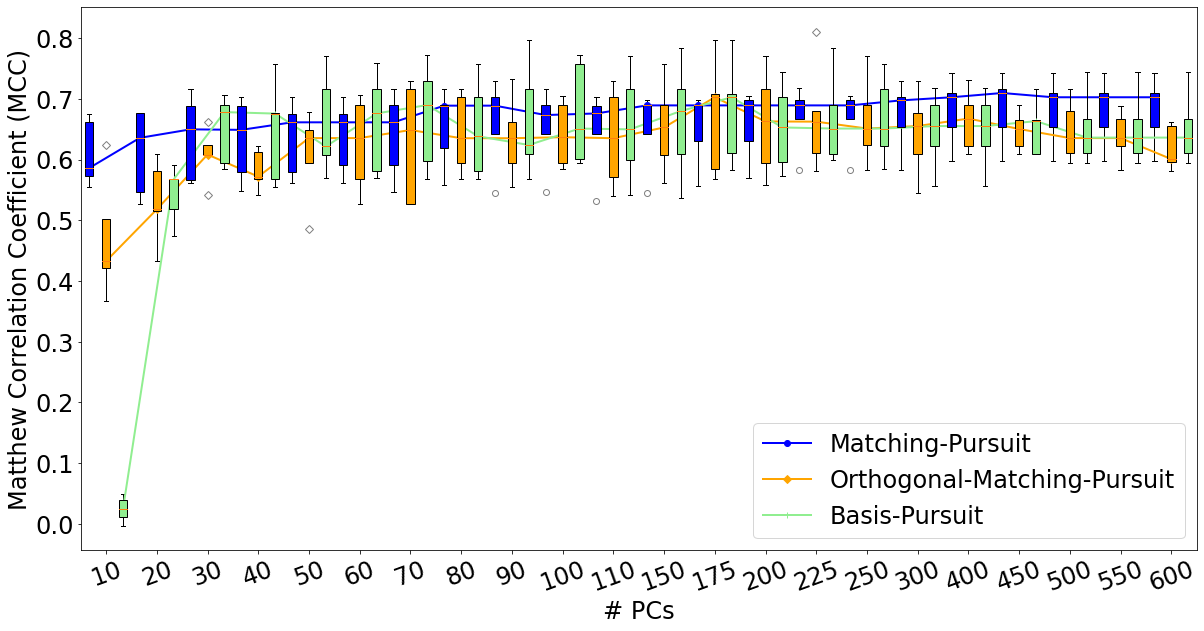

In [20]:
colors = ['blue', 'orange', 'lightgreen']
marker = ['o', 'D', '+']

# plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams.update({'font.size': 24})

fig = plt.figure(figsize =(20, 10))

box_plot_results(mp_pc_wise_class_stats[4,:].squeeze(),txtPCs,'Matching-Pursuit',colors[0],marker[0])
box_plot_results(op_pc_wise_class_stats[4,:].squeeze(),txtPCs,'Orthogonal-Matching-Pursuit',colors[1],marker[1])
box_plot_results(bp_pc_wise_class_stats[4,:].squeeze(),txtPCs,'Basis-Pursuit',colors[2],marker[2])
# plt.ylim(bottom=0.5)
# plt.ylim(top=1.1)
plt.xlabel('# PCs')
plt.ylabel('Matthew Correlation Coefficient (MCC)')
# plt.title('Comparison of Mathew Correlation Coefficient (MCC)')
# show plot
plt.legend()
plt.savefig('MCC_comparison.png',dpi=(300), bbox_inches='tight')
plt.show()

start_pos: 1
start_pos: 1
start_pos: 2
start_pos: 3


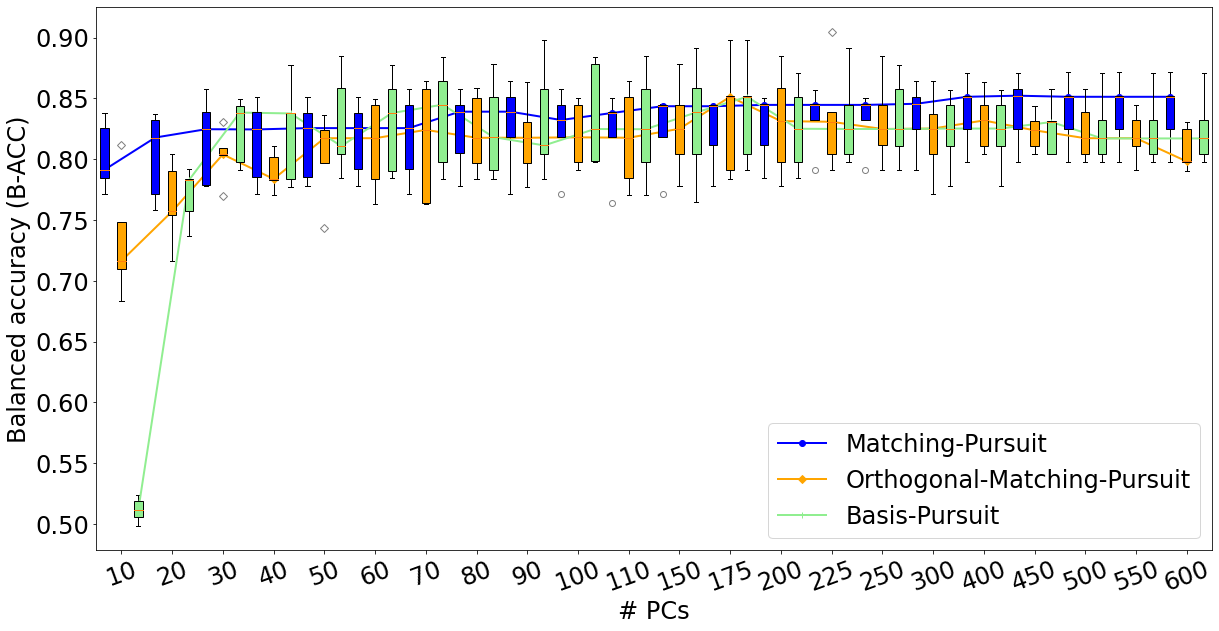

In [21]:
colors = ['blue', 'orange', 'lightgreen']
marker = ['o', 'D', '+']

# plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams.update({'font.size': 24})

fig = plt.figure(figsize =(20, 10))

box_plot_results(mp_pc_wise_class_stats[5,:].squeeze(),txtPCs,'Matching-Pursuit',colors[0],marker[0])
box_plot_results(op_pc_wise_class_stats[5,:].squeeze(),txtPCs,'Orthogonal-Matching-Pursuit',colors[1],marker[1])
box_plot_results(bp_pc_wise_class_stats[5,:].squeeze(),txtPCs,'Basis-Pursuit',colors[2],marker[2])
# plt.ylim(bottom=0.5)
# plt.ylim(top=1.1)
plt.xlabel('# PCs')
plt.ylabel('Balanced accuracy (B-ACC)')
# plt.title('Comparison of Balanced accuracy (B-ACC)')
# show plot
plt.legend()
plt.savefig('BACC_comparison.png',dpi=(300), bbox_inches='tight')
plt.show()

start_pos: 1
start_pos: 1
start_pos: 2
start_pos: 3


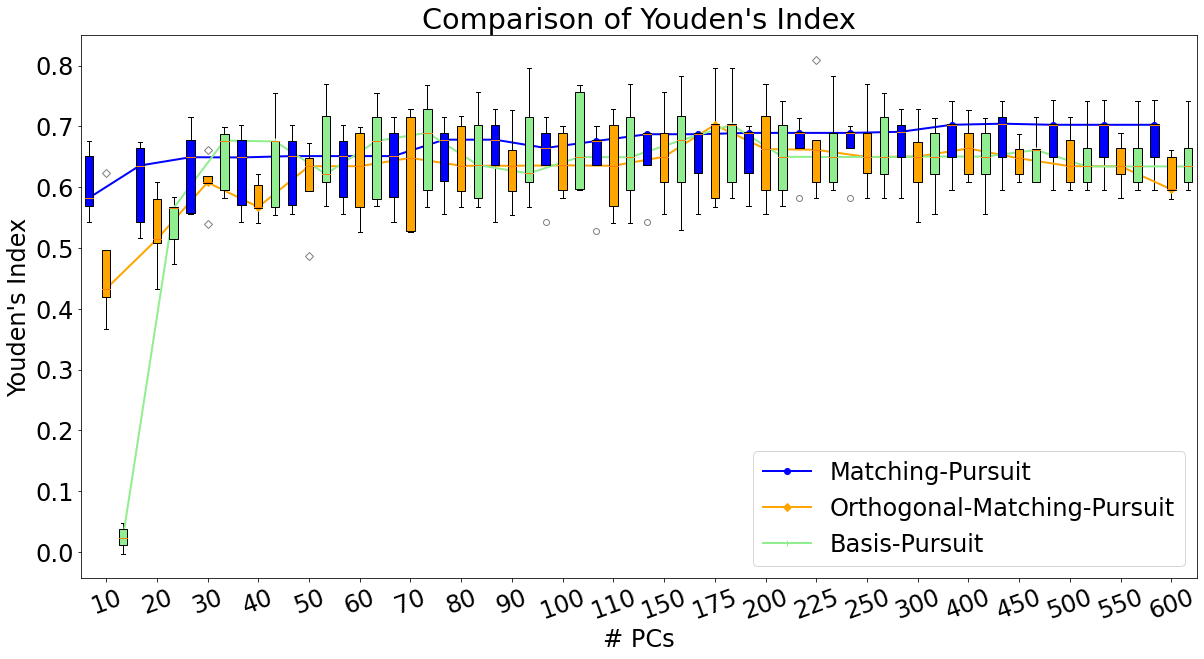

In [ ]:
colors = ['blue', 'orange', 'lightgreen']
marker = ['o', 'D', '+']

# plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams.update({'font.size': 24})

fig = plt.figure(figsize =(20, 10))

box_plot_results(mp_pc_wise_class_stats[6,:].squeeze(),txtPCs,'Matching-Pursuit',colors[0],marker[0])
box_plot_results(op_pc_wise_class_stats[6,:].squeeze(),txtPCs,'Orthogonal-Matching-Pursuit',colors[1],marker[1])
box_plot_results(bp_pc_wise_class_stats[6,:].squeeze(),txtPCs,'Basis-Pursuit',colors[2],marker[2])
# plt.ylim(bottom=0.5)
# plt.ylim(top=1.1)
plt.xlabel('# PCs')
plt.ylabel('Youden\'s Index')
# plt.title('Comparison of Youden\'s Index')
# show plot
plt.legend()
plt.savefig('Youden_index_comparison.png',dpi=(300), bbox_inches='tight')
plt.show()